In [1]:
# import Numpy and Pandas
import numpy as np
import pandas as pd

# for reading and displaying images, import imread and matplotlilb
import matplotlib.pyplot as plt

# for creating validation set, import train_test_split; understand how the function works
from sklearn.model_selection import train_test_split

# for evaluating the model, import accuracy_score from sklearn
from sklearn.metrics import accuracy_score

# Import necessary PyTorch libraries and modules
import torch
import torchvision
import torch.nn as nn
from torch.utils.data import DataLoader 
import torchvision.transforms as transforms


DATA_PATH = 'C:\\Users\\intel\\Desktop\\IG_AI'
MODEL_STORE_PATH = 'C:\\Users\\intel\\Desktop\\IG_AI'


# Import dataset from pytorch vision - Fashion MNIST
# transforms to apply to the data
trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0,),(1,))])

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root=DATA_PATH, train=True, transform=trans, download=True)
test_dataset = torchvision.datasets.MNIST(root=DATA_PATH, train=False, transform=trans)


In [2]:
# load dataset and use dataloader to send the data in batches.
batch_size = 100
alpha = 0.001
epochs = 6
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)
# Convert data to tensor and normalise it

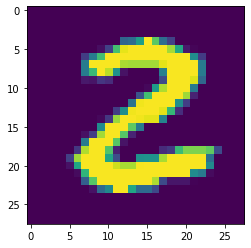

In [3]:
# Visualise some random images from the datset. Check the shape of tensors to get a better understanding of the dataset.
x=train_dataset[25]
x=x[0].numpy()
x=x.reshape(28,28)
plt.imshow(x)
plt.show()
#im show was not accepting tensor show 1X28X28 tensor is converted to 28 X 28 np.array 

In [4]:
# Define the network architecture(model) using a class.
# Use conv2d layers, activation function after each such layer, use Batchnorm and Maxpooling. Play with these parameters,
# layers and things like kernel size, stride etc and see how it affects your results.
# Finally use a linear layer in the end
# Define the forward pass
class model(nn.Module):
    #passing this class and class object to super class constructor
    def __init__(self):
        super(model,self).__init__()
        self.layer1=nn.Sequential(
            nn.Conv2d(1,32,kernel_size=5,stride=1,padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2))
        # one image 32 different filters with 3 X 3 filter and stride of one and padding of 1
        # 32 feature map are produced after the convolution
        # relu is added to eliminatine linearity in the network
        # max pooling to reduce the size and make model space in varient
        # w_out=(w_in - F +2*p)/s +1
        # and max pooling reduces size by (n/p X n/p)
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.drop_out = nn.Dropout()
        # 7 X 7 image map is prooduced after 2 covolution layers and pooling and 64 usch feature maps are produced
        # we are squassing this into a coloum vector and feeding them to a neural network
        self.fc1 = nn.Linear(7 * 7 * 64, 1000)
        self.fc2 = nn.Linear(1000, 10)
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.drop_out(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

In [5]:
# Define training the model
    my_model=model()
    # defining the optimizer
    loss_function=nn.CrossEntropyLoss() # this loss function is to estimate loss during multi class classification
    # defining the loss function
    optimizer=torch.optim.Adam(my_model.parameters(),lr=alpha)
    loss_list=[]
    acc_list=[]
    total_step=len(train_loader)
    for epoch in range(epochs):
        for i,(image,labels) in enumerate(train_loader):
            #forward function makes all operations on image which are loaded in the constructor
            output=my_model.forward(image)
            loss=loss_function(output,labels)
            loss_list.append(loss.item())
            #back propagate the error
            optimizer.zero_grad()
            loss.backward() 
            # as in torch nn module all paramneter required_grad is set to true so gradient are                                     # calculated and back propagated 
            optimizer.step()
            #accuracy
            total = labels.size(0)
            _, predicted = torch.max(output.data, 1)
            correct = (predicted == labels).sum().item()
            acc_list.append(correct / total)
            if (i + 1) % 100 == 0:
                print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
                    .format(epoch + 1, epochs, i + 1, total_step, loss.item(),
                            (correct / total) * 100))


Epoch [1/6], Step [100/600], Loss: 0.1093, Accuracy: 98.00%
Epoch [1/6], Step [200/600], Loss: 0.1343, Accuracy: 96.00%
Epoch [1/6], Step [300/600], Loss: 0.1687, Accuracy: 93.00%
Epoch [1/6], Step [400/600], Loss: 0.0850, Accuracy: 97.00%
Epoch [1/6], Step [500/600], Loss: 0.1932, Accuracy: 95.00%
Epoch [1/6], Step [600/600], Loss: 0.0198, Accuracy: 99.00%
Epoch [2/6], Step [100/600], Loss: 0.0470, Accuracy: 97.00%
Epoch [2/6], Step [200/600], Loss: 0.0611, Accuracy: 98.00%
Epoch [2/6], Step [300/600], Loss: 0.0512, Accuracy: 98.00%
Epoch [2/6], Step [400/600], Loss: 0.0989, Accuracy: 96.00%
Epoch [2/6], Step [500/600], Loss: 0.0146, Accuracy: 100.00%
Epoch [2/6], Step [600/600], Loss: 0.0970, Accuracy: 97.00%
Epoch [3/6], Step [100/600], Loss: 0.0715, Accuracy: 97.00%
Epoch [3/6], Step [200/600], Loss: 0.0171, Accuracy: 100.00%
Epoch [3/6], Step [300/600], Loss: 0.0128, Accuracy: 100.00%
Epoch [3/6], Step [400/600], Loss: 0.1129, Accuracy: 97.00%
Epoch [3/6], Step [500/600], Loss: 0.

In [12]:
     
# Evaluate model on test set. This is done in the same way as for training but only till calculating output.
# Then,convert output from tensor to numpy format.
# convert to class labels
# store the predictions
# calculate accuracy of model
# Try to improve accuracy by changing parameters, optimizer, loss functions, epochs etc
# and explain your observations in a text file in the Github repository.

#this disables droup outs and batch normalization layers and directly predict outputs
my_model.eval()
with torch.no_grad(): # these operation are not involved in gradient tracking
    correct=0
    total=0
    i=0
    for images,labels in test_loader:
        output=my_model.forward(images)
        _,predict=torch.max(output.data,1)# we are taing output.data so as to avoid taking gradient of that process
        total+=labels.size(0)
        correct+=(predict==labels).sum().item()
        print('Test Accuracy of the model on the 10000 test images: {} %'.format((correct / total) * 100))

# Save the model and plot
torch.save(my_model.state_dict(), MODEL_STORE_PATH + 'conv_net_model.ckpt')





Test Accuracy of the model on the 10000 test images: 100.0 %
Test Accuracy of the model on the 10000 test images: 99.5 %
Test Accuracy of the model on the 10000 test images: 99.33333333333333 %
Test Accuracy of the model on the 10000 test images: 99.0 %
Test Accuracy of the model on the 10000 test images: 98.8 %
Test Accuracy of the model on the 10000 test images: 98.83333333333333 %
Test Accuracy of the model on the 10000 test images: 98.71428571428571 %
Test Accuracy of the model on the 10000 test images: 98.75 %
Test Accuracy of the model on the 10000 test images: 98.77777777777777 %
Test Accuracy of the model on the 10000 test images: 98.8 %
Test Accuracy of the model on the 10000 test images: 98.63636363636363 %
Test Accuracy of the model on the 10000 test images: 98.66666666666667 %
Test Accuracy of the model on the 10000 test images: 98.38461538461539 %
Test Accuracy of the model on the 10000 test images: 98.42857142857143 %
Test Accuracy of the model on the 10000 test images: 9

  
  Try to improve accuracy by changing parameters, optimizer, loss functions, epochs etc
  and explain your observations in a text file in the Github repository.
  

In [1]:
# check predictions by printing the output image for random test inputs.

        